> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：TMDb电影数据集探索与分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [220]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#读入数据
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [221]:
#查看数据大小
df.shape

(10866, 21)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [223]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [224]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [225]:
sum(df.duplicated())

1

In [226]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [227]:
#根据现有的特征字段，初步确定可以提出的相关问题：
#1、随着时间的变化，电影的类型是否有所变化？电影数量是否有变化？
#2、各个类型的电影平均票房收入分析？
#3、电影的票房收入与成本投入有关系嘛？
#4、哪个制片公司最赚钱？（通过票房总收入间接反映制片公司赚钱能力）
#5、投票数TOP10的电影是哪些？投票数高的电影，票房高嘛？

### 数据清理（删除重复数据及不要的列、转换数据类型、新增列、处理空值）

In [228]:
# 删除重复行
df = df.drop_duplicates()
#再次查看是否有重复数据
df.duplicated().sum()

0

In [229]:
#删除无关紧要的列（根据一开始提出的问题，删除一些无关紧要的字段）
df.drop(['imdb_id','budget','revenue','cast','homepage','director','tagline','overview'],axis=1,inplace=True)
df.head(1)

,id,popularity,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [230]:
#确认删除了不要的列
df.shape

(10865, 13)

In [231]:
###转换数据类型

In [232]:
#修改数据类型（id列改为字符串）
df['id']=df['id'].astype(str)
type(df['id'][0])

str

In [233]:
#修改release_date列为时间
df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [234]:
#取消budget_adj,revenue_adj列的科学计数法转化为整形
df['budget_adj'] = df['budget_adj'].astype(np.int64)
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)
df.head(1)

,id,popularity,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892


In [235]:
type(df['release_year'][0])

numpy.int64

In [236]:
#从release_date列中提取发行月为新列
df['release_month'] = df.release_date.dt.month
df.head(1)

,id,popularity,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,6


In [237]:
df['release_month'].unique()

array([ 6,  5,  3, 12,  4,  9, 10,  2,  1,  7, 11,  8])

In [238]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [239]:
#重新确认所有数据的类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null object
popularity              10865 non-null float64
original_title          10865 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null int64
revenue_adj             10865 non-null int64
release_month           10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.6+ MB


In [240]:
###处理缺失值

In [241]:
#查看缺失值情况
df.isnull().sum()

id                         0
popularity                 0
original_title             0
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64

In [242]:
#keywords,production_companies缺失值占样本的10%，手工补充工作量较大，故当做NaN值处理，需要分析时，去掉这部分空值；genres缺失量较少，可以考虑手工补充，但为了节约时间，本次也暂时作为NaN值处理

In [243]:
#将清洗后的数据进行保存
df.to_csv('TMDB_clean_v1.csv',index = False)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（随着时间的变化，电影的数量是否有所变化？ ）
分析结论：纵观50年的时间，电影的数量逐年攀升；90年后，增长迅速；

In [244]:
#读入数据创新新的数据框
df_clean = pd.read_csv('TMDB_clean_v1.csv')
df_clean.head(1)

,id,popularity,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,6


In [245]:
#删除genres缺失的行
df_clean.dropna(inplace = True)
df_clean.shape

(8701, 14)

In [246]:
#创建df_genres数据框作为df_clean的备份
df_genres = df_clean.copy()

In [247]:
#拆分genres字段，创建电影类型genres列表
df_genres.genres = df_genres.genres.str.split('|')

genres = set()
df_genres['genres'].apply(lambda x:genres.update(x))
print(genres)

{'History', 'Crime', 'Foreign', 'Mystery', 'Comedy', 'Family', 'Fantasy', 'Documentary', 'Romance', 'Thriller', 'Drama', 'Animation', 'Western', 'War', 'Music', 'Adventure', 'Horror', 'Action', 'TV Movie', 'Science Fiction'}


In [248]:
#整理每部电影的类别
for genre in genres:
    df_genres[genre] = df_genres['genres'].apply(lambda x:1 if genre in x else 0)
df_genres.head(1)

,id,popularity,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,...,Drama,Animation,Western,War,Music,Adventure,Horror,Action,TV Movie,Science Fiction
0,135397,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,...,0,0,0,0,0,1,0,1,0,1


In [249]:
#查看数据规模，多了20列
df_genres.shape

(8701, 34)

In [250]:
df_genres['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

Text(0,0.5,'count')

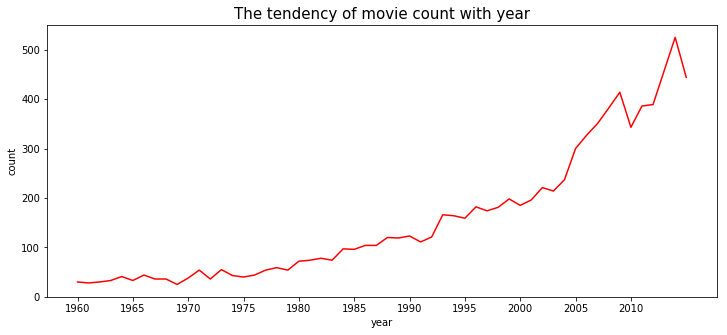

In [251]:
#通过可视化分析：随着时间变化，电影的数量是否有变化
df_genres.groupby(['release_year']).count()['id'].plot(color='r',figsize = (12,5))
plt.xticks(range(1960,2015,5))
plt.title('The tendency of movie count with year',fontsize = 15)
plt.xlabel('year',fontsize = 10)
plt.ylabel('count',fontsize = 10)

### 研究问题 2（随着时间变化，不同类型的电影的数量是否有变化？）
分析结论：1、历史题材的电影数量一致位于榜首；2、音乐题材的电影数量从1985后，逐渐增多，到2015年该题材电影数量位局第二

In [252]:
#创建每个年份不同类型电影数量的数据框，分析：随着时间变化，不同类型的电影的数量是否有变化
df_genres_v1 = df_genres.groupby(['release_year']).sum()

df_genres_v1.head(1)

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_month,History,Crime,...,Drama,Animation,Western,War,Music,Adventure,Horror,Action,TV Movie,Science Fiction
release_year,,,,,,,,,,,,,,,,,,,,,
1960,465136,14.435065,3353,2456,190.3,140506254,1016769074,213,4,2,...,12,0,6,1,1,5,7,7,0,3


In [253]:
df_genres_v1.columns

Index(['id', 'popularity', 'runtime', 'vote_count', 'vote_average',
       'budget_adj', 'revenue_adj', 'release_month', 'History', 'Crime',
       'Foreign', 'Mystery', 'Comedy', 'Family', 'Fantasy', 'Documentary',
       'Romance', 'Thriller', 'Drama', 'Animation', 'Western', 'War', 'Music',
       'Adventure', 'Horror', 'Action', 'TV Movie', 'Science Fiction'],
      dtype='object')

In [295]:
df_genres_v2 = df_genres_v1.drop(['id', 'popularity', 'runtime', 'vote_count', 'vote_average',
       'budget_adj', 'revenue_adj','release_month'],axis = 1)

In [296]:
df_genres_v2.columns

Index(['History', 'Crime', 'Foreign', 'Mystery', 'Comedy', 'Family', 'Fantasy',
       'Documentary', 'Romance', 'Thriller', 'Drama', 'Animation', 'Western',
       'War', 'Music', 'Adventure', 'Horror', 'Action', 'TV Movie',
       'Science Fiction'],
      dtype='object')

Text(0,0.5,'count')

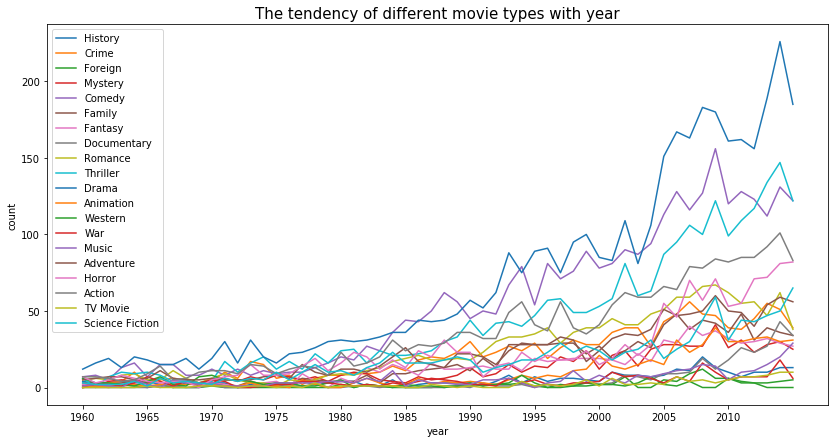

In [297]:
plt.figure(figsize=(14,7))
plt.plot(df_genres_v2,label=df_genres.columns)
plt.legend(df_genres_v2.columns,loc='upper left')
plt.xticks(range(1960,2015,5))
plt.title('The tendency of different movie types with year',fontsize = 15)
plt.xlabel('year',fontsize = 10)
plt.ylabel('count',fontsize = 10)

### 研究问题 3（影响电影票房的因素分析）
分析结论：票房与利润、预算、投票数、热度呈现正相关；且利润和票房成明显的线性关系；与平均投票数、电影时长负相关或不相关；

In [292]:
df_clean.shape

(8701, 15)

In [258]:
#创建利润列
df_clean['profits'] = df_clean['revenue_adj']-df_clean['budget_adj']
df_clean.head(1)

,id,popularity,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profits
0,135397,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,6,1254445953


Text(0.5,1,'The relationship with revenue and profits')

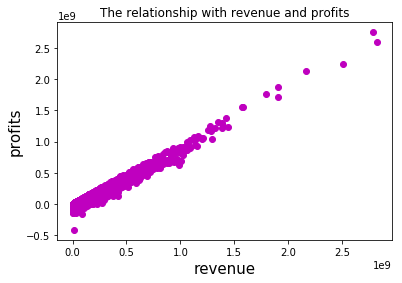

In [293]:
#电影票房与利润的关系
plt.scatter(x=df_clean.revenue_adj,y=df_clean.profits,color='m')
plt.xlabel('revenue',fontsize=15)
plt.ylabel('profits',fontsize=15)
plt.title('The relationship with revenue and profits')

Text(0.5,1,'The relationship with revenue and budget')

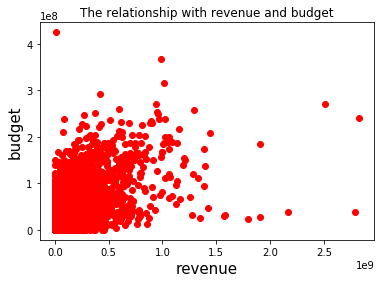

In [259]:
#电影票房与成本的关系
plt.scatter(x=df_clean.revenue_adj,y=df_clean.budget_adj,color='r')
plt.xlabel('revenue',fontsize=15)
plt.ylabel('budget',fontsize=15)
plt.title('The relationship with revenue and budget')

Text(0.5,1,'The relationship with revenue and vote_count')

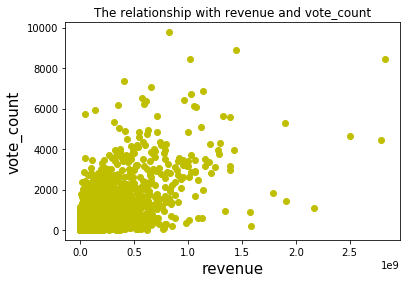

In [260]:
#电影票房与投票数的关系
plt.scatter(x=df_clean.revenue_adj,y=df_clean.vote_count,color='y')
plt.xlabel('revenue',fontsize=15)
plt.ylabel('vote_count',fontsize=15)
plt.title('The relationship with revenue and vote_count')

Text(0.5,1,'The relationship with revenue and vote_average')

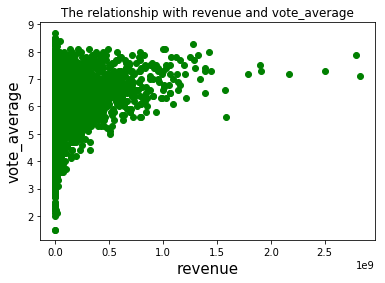

In [261]:
#电影票房与平均投票数的关系
plt.scatter(x=df_clean.revenue_adj,y=df_clean.vote_average,color='g')
plt.xlabel('revenue',fontsize=15)
plt.ylabel('vote_average',fontsize=15)
plt.title('The relationship with revenue and vote_average')

Text(0.5,1,'The relationship with revenue and popularity')

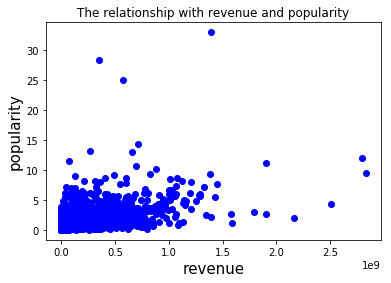

In [262]:
#电影票房与热度的关系
plt.scatter(x=df_clean.revenue_adj,y=df_clean.popularity,color='b')
plt.xlabel('revenue',fontsize=15)
plt.ylabel('popularity',fontsize=15)
plt.title('The relationship with revenue and popularity')

Text(0.5,1,'The relationship with revenue and runtime')

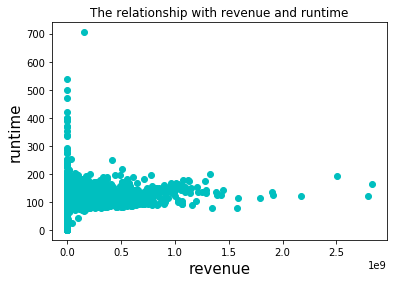

In [263]:
#电影票房与电影时长的关系
plt.scatter(x=df_clean.revenue_adj,y=df_clean.runtime,color='c')
plt.xlabel('revenue',fontsize=15)
plt.ylabel('runtime',fontsize=15)
plt.title('The relationship with revenue and runtime')

### 研究问题 4（哪个月是电影上映的热门月？）
分析结论：通过分析，票房TOP3的月份分别是12月，6月，5月；

In [273]:
#创建每个月份电影数量的数据框
df_month_v1 = df_genres.groupby(['release_month']).sum().sort_values(by = 'revenue_adj',ascending = False)
df_month_v1

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,History,Crime,...,Drama,Animation,Western,War,Music,Adventure,Horror,Action,TV Movie,Science Fiction
release_month,,,,,,,,,,,,,,,,,,,,,
12,38154953,695.375237,91190,256148,5052.7,1626925,24542543853,82735411729,55,95,...,425,59,21,37,40,157,65,176,8,75
6,37481233,633.126339,72785,265532,4226.1,1394117,21992783905,80328258732,16,88,...,278,56,19,20,32,140,86,196,6,97
5,35981843,567.993111,70265,238629,4005.9,1330303,18288895895,61131594617,28,72,...,300,29,19,19,18,108,111,174,11,84
11,38045989,565.359016,67662,201789,3987.4,1309628,17824640530,57712617395,22,78,...,292,76,12,21,27,105,86,136,16,68
7,37625753,556.874003,67004,232179,3894.1,1303218,17675775594,57317785554,17,84,...,230,37,14,10,26,134,87,174,9,110
3,35005196,488.446781,68127,177151,3910.8,1312087,13615354733,40334590487,16,103,...,277,40,11,14,21,100,89,160,9,97
10,63424375,639.581887,93434,208646,5473.6,1828245,15249769674,37877835680,39,97,...,408,49,16,26,31,102,228,173,17,100
8,44543880,480.675402,73660,141091,4326.6,1476399,12770527882,32089964168,15,102,...,289,41,9,13,32,103,147,196,11,99
4,34759431,403.585304,63210,146339,3691.2,1252752,11805186511,31234224629,12,90,...,254,22,9,15,15,96,102,176,8,81


Text(0.5,1,'The revenue in different months')

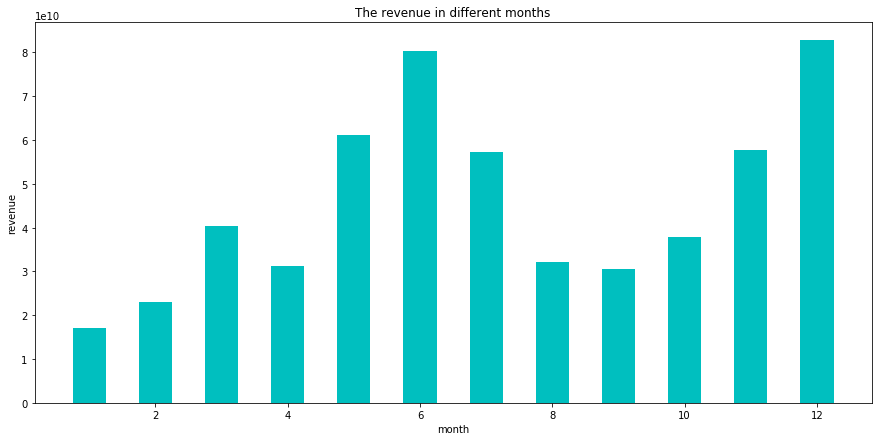

In [291]:
x = df_month_v1.index
y = df_month_v1['revenue_adj']
plt.figure(figsize = (15,7))
plt.bar(x,height = y,width = 0.5,color='c')
plt.xlabel('month')
plt.ylabel('revenue')
plt.title('The revenue in different months' )

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

### 研究问题 1（随着时间的变化，电影的数量是否有所变化？ ）
分析结论：纵观50年的时间，电影的数量逐年攀升；90年后，增长迅速；

### 研究问题 2（随着时间变化，不同类型的电影的数量是否有变化？）
分析结论：1、历史题材的电影数量一致位于榜首；2、音乐题材的电影数量从1985后，逐渐增多，到2015年该题材电影数量位局第二

### 研究问题 3（影响电影票房的因素分析）
分析结论：票房与利润、预算、投票数、热度呈现正相关；且利润和票房成明显的线性关系；与平均投票数、电影时长负相关或不相关；

### 研究问题 4（哪个月是电影上映的热门月？）
分析结论：通过分析，票房TOP3的月份分别是12月，6月，5月；

<a id='conclusions'></a>
## 局限性

本次分析仅使用数据进行了描述性统计和可视化分析，没有运用机器学习的方法进行预测推论，故存在一定的局限性，待后期进一步完善。

<a id='conclusions'></a>
## 查阅网络资料附录：
1、取消科学计数法
https://www.jianshu.com/p/90144d5fc985

2、pandas astype 将科学计数法转化成整形int
https://blog.csdn.net/weixin_33717117/article/details/89687394

3、pandas模块dropna数据清理删除空值
https://jingyan.baidu.com/article/ff4116250521ce12e4823795.html

4、python matplotlib bar柱形图x轴不按顺序排列的问题
https://www.jianshu.com/p/64c34e21a5e1

5、图例的参数设置
https://blog.csdn.net/qq_35240640/article/details/89478439

6、Python干货：分享Python绘制六种可视化图表
http://www.sohu.com/a/253799041_100169910

7、pandas的字符串的分割之str.split()
https://www.jianshu.com/p/4a2ecf65e3ea

In [300]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255